In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import mpl_toolkits.mplot3d as plt3d
import matplotlib.animation as animation
import pandas as pd
import os

filename = 'csv_joined.csv'
directory = './3dpose_gan/csv_out/'

fullpath = os.path.join(directory, filename)

In [2]:
df = pd.read_csv(fullpath)

xs = df.iloc[:,1::3].values.tolist()
ys = df.iloc[:,2::3].values.tolist()
zs = df.iloc[:,3::3].values.tolist()

<IPython.core.display.Javascript object>


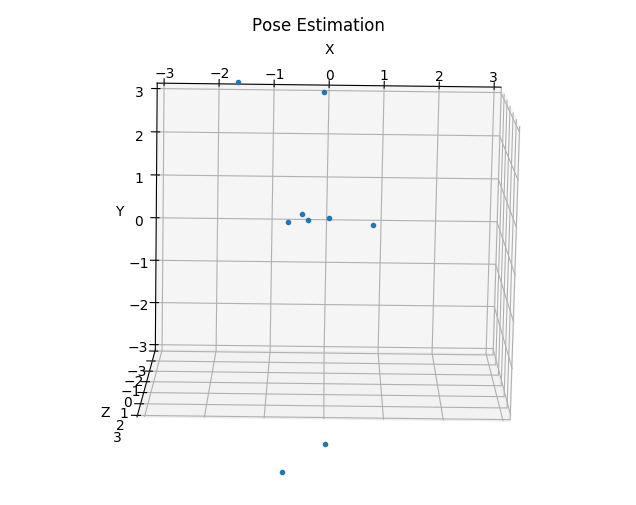

In [3]:
fig = plt.figure()
ax = p3.Axes3D(fig)

ax.view_init(elev=90., azim=270)
ax.set_xlim3d([-3.0, 3.0])
ax.set_xlabel('X')

ax.set_ylim3d([-3.0, 3.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-3.0, 3.0])
ax.set_zlabel('Z')

ax.set_title('Pose Estimation')

sct, = ax.plot([], [], [], "o", markersize=3)

lines = [ax.plot([], [], [])[0] for index in range(16)]

Bodypairs = [
			[0,1], [1,2], [4,5], [4,3], [2,8], [15,2], [15,3], [12,14],
			[8,7], [10,11], [6,7], [9,10], [3,9], [12,8], [12,9], [13,14]
			]
			
nframes = len(df)
fps = 30

def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])

    for idx, line in enumerate(lines):
    	line.set_data(tuple(xa[ifrm][Bodypairs[idx]]), tuple(ya[ifrm][Bodypairs[idx]]))
    	line.set_3d_properties(tuple(za[ifrm][Bodypairs[idx]]))

In [4]:
anim = animation.FuncAnimation(fig, update, nframes, fargs=(xs,ys,zs), interval=1000/fps)

plt.show()